In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_csv(r'../raw_data/df_energy_weather.csv', index_col=[0])
df.shape


(3417, 45)

In [18]:
apple_training_complete = df[0:3238].drop(columns=['Date'])

In [19]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [20]:
apple_training_processed

array([[252371.],
       [280064.],
       [285526.],
       ...,
       [231720.],
       [212996.],
       [219275.]])

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [22]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [23]:
features_set, labels = np.array(features_set), np.array(labels)

In [24]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [27]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models

In [28]:
model = models.Sequential()

2022-06-17 14:25:35.284967: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
#model = Sequential()

model.add(LSTM(units=90, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=70, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))



'''
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
'''

'\nmodel = Sequential()\n\nmodel.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units=50, return_sequences=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units=50, return_sequences=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units=50))\nmodel.add(Dropout(0.2))\n'

In [36]:
model.add(Dense(units = 1, activation ='linear'))

In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
model.fit(features_set, labels, epochs = 90, batch_size = 32)

Epoch 1/90
38/38 [==============================] - 7s 86ms/step - loss: 0.0296
Epoch 2/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0139
Epoch 3/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0128
Epoch 4/90
38/38 [==============================] - 3s 84ms/step - loss: 0.0122
Epoch 5/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0098
Epoch 6/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0103
Epoch 7/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0092
Epoch 8/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0093
Epoch 9/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0083
Epoch 10/90
38/38 [==============================] - 3s 86ms/step - loss: 0.0078
Epoch 11/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0079
Epoch 12/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0076
Epoch 13/90
38/38 [==================

In [39]:
apple_testing_complete = df[3238:].drop(columns=['Date'])
#apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values
apple_testing_processed = apple_testing_complete['Consommation (MW)'].values

In [40]:
apple_total = pd.concat((apple_training_complete['Consommation (MW)'], apple_testing_complete['Consommation (MW)']), axis=0)
apple_total

0       252371.0
1       280064.0
2       285526.0
3       286799.0
4       267848.0
          ...   
3412    218296.0
3413    209770.0
3414    201061.0
3415    194195.0
3416    187301.0
Name: Consommation (MW), Length: 3417, dtype: float64

In [41]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [42]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_inputs

array([[0.21651559],
       [0.22172419],
       [0.21551209],
       [0.21660638],
       [0.15137455],
       [0.11041769],
       [0.15998069],
       [0.17327937],
       [0.17993587],
       [0.18484821],
       [0.1896602 ],
       [0.15091103],
       [0.09194864],
       [0.16135214],
       [0.17377634],
       [0.18005534],
       [0.17963482],
       [0.18342898],
       [0.12659782],
       [0.10491282],
       [0.13968146],
       [0.15572302],
       [0.17708786],
       [0.17969217],
       [0.19515074],
       [0.14816337],
       [0.12356345],
       [0.17570209],
       [0.19064458],
       [0.19730586],
       [0.20411528],
       [0.21469496],
       [0.1710239 ],
       [0.13920839],
       [0.19682801],
       [0.20647588],
       [0.20554406],
       [0.18964586],
       [0.20119559],
       [0.18121652],
       [0.1595554 ],
       [0.21894786],
       [0.23177346],
       [0.23703463],
       [0.25073948],
       [0.25208703],
       [0.23428697],
       [0.165

In [43]:
test_features = []
for i in range(60, 240):
    test_features.append(test_inputs[i-60:i, 0])
test_features

[array([0.21651559, 0.22172419, 0.21551209, 0.21660638, 0.15137455,
        0.11041769, 0.15998069, 0.17327937, 0.17993587, 0.18484821,
        0.1896602 , 0.15091103, 0.09194864, 0.16135214, 0.17377634,
        0.18005534, 0.17963482, 0.18342898, 0.12659782, 0.10491282,
        0.13968146, 0.15572302, 0.17708786, 0.17969217, 0.19515074,
        0.14816337, 0.12356345, 0.17570209, 0.19064458, 0.19730586,
        0.20411528, 0.21469496, 0.1710239 , 0.13920839, 0.19682801,
        0.20647588, 0.20554406, 0.18964586, 0.20119559, 0.18121652,
        0.1595554 , 0.21894786, 0.23177346, 0.23703463, 0.25073948,
        0.25208703, 0.23428697, 0.16508417, 0.16841482, 0.23807157,
        0.29075496, 0.36449737, 0.40640515, 0.36388094, 0.36494655,
        0.37753322, 0.39497489, 0.37286459, 0.28339123, 0.31339568]),
 array([0.22172419, 0.21551209, 0.21660638, 0.15137455, 0.11041769,
        0.15998069, 0.17327937, 0.17993587, 0.18484821, 0.1896602 ,
        0.15091103, 0.09194864, 0.16135214, 0.

In [44]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [45]:
predictions = model.predict(test_features)
predictions

array([[0.3386529 ],
       [0.30915454],
       [0.30307704],
       [0.36087954],
       [0.3392893 ],
       [0.35024014],
       [0.36376497],
       [0.37192744],
       [0.350201  ],
       [0.37721205],
       [0.44440028],
       [0.44730523],
       [0.45055938],
       [0.47747284],
       [0.4950707 ],
       [0.49910384],
       [0.53228736],
       [0.64262617],
       [0.69353193],
       [0.64838475],
       [0.61465836],
       [0.6990152 ],
       [0.6260217 ],
       [0.61527795],
       [0.70002574],
       [0.6732651 ],
       [0.6343639 ],
       [0.6770315 ],
       [0.70977557],
       [0.63251734],
       [0.6287763 ],
       [0.6955363 ],
       [0.67701685],
       [0.6383091 ],
       [0.6709729 ],
       [0.66358024],
       [0.59823334],
       [0.60234284],
       [0.70530224],
       [0.6965634 ],
       [0.6566434 ],
       [0.64068836],
       [0.5651463 ],
       [0.48690915],
       [0.49574918],
       [0.5863688 ],
       [0.5445129 ],
       [0.445

In [46]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[224560.55],
       [218387.45],
       [217115.62],
       [229211.9 ],
       [224693.73],
       [226985.4 ],
       [229815.73],
       [231523.88],
       [226977.22],
       [232629.8 ],
       [246690.22],
       [247298.11],
       [247979.11],
       [253611.25],
       [257293.95],
       [258137.95],
       [265082.25],
       [288172.75],
       [298825.72],
       [289377.8 ],
       [282319.94],
       [299973.2 ],
       [284697.9 ],
       [282449.6 ],
       [300184.7 ],
       [294584.53],
       [286443.7 ],
       [295372.72],
       [302225.03],
       [286057.28],
       [285274.4 ],
       [299245.2 ],
       [295369.66],
       [287269.3 ],
       [294104.8 ],
       [292557.75],
       [278882.7 ],
       [279742.7 ],
       [301288.9 ],
       [299460.12],
       [291106.1 ],
       [287767.2 ],
       [271958.6 ],
       [255586.  ],
       [257435.92],
       [276399.8 ],
       [267640.66],
       [246992.8 ],
       [236957.19],
       [243103.69],


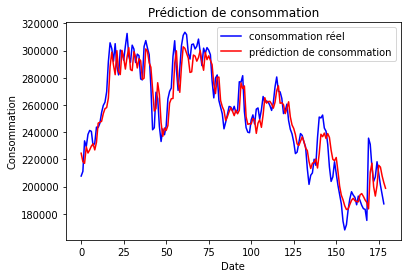

In [47]:
plt.figure()#figsize=(10,6)
plt.plot(apple_testing_processed, color='blue', label='consommation réel')
plt.plot(predictions , color='red', label='prédiction de consommation')
plt.title('Prédiction de consommation')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.legend()
plt.show()

In [48]:
# test
res = model_2.evaluate(X_test, y_test, verbose=1)

print(f'MAPE on the test set : {res[1]:.0f} %')

NameError: name 'model_2' is not defined